<a href="https://colab.research.google.com/github/sumalatha456/holiday_list/blob/main/RL_HOLIDAYS_PROJECT_099.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
### 1. Implement Upper-Confidence bound algorithm (UCB) in Multi Arm Banding Problem to optimize player rewards in a basic game simulation with Python Program.
### The game scenario involves a player choosing between different "actions" (like doors, treasures, or paths), each with a hidden reward probability. The UCB algorithm must help the game adapt dynamically to maximize the player's experience.

### 1. Implement Upper-Confidence bound algorithm (UCB) in Multi Arm Banding Problem to optimize player rewards in a basic game simulation with Python Program.
### The game scenario involves a player choosing between different "actions" (like doors, treasures, or paths), each with a hidden reward probability. The UCB algorithm must help the game adapt dynamically to maximize the player's experience.

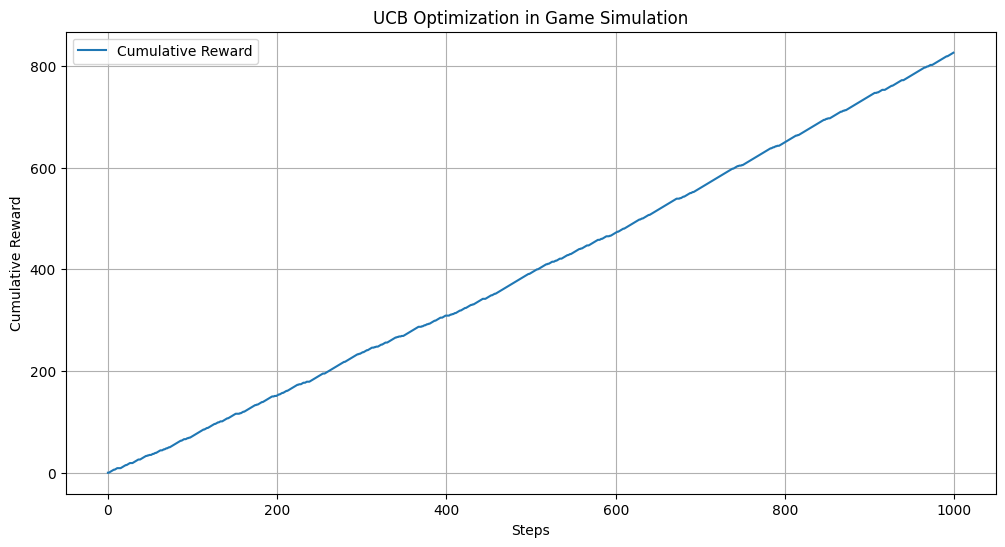

Action counts: [ 17.  36.  42. 163. 742.]
True reward probabilities: [0.1, 0.3, 0.5, 0.7, 0.9]


In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

# Define the UCB algorithm
class UCB:
    def __init__(self, n_actions):
        self.n_actions = n_actions
        self.action_counts = np.zeros(n_actions)  # Number of times each action was chosen
        self.action_rewards = np.zeros(n_actions)  # Sum of rewards for each action

    def select_action(self, step):
        # Select action using UCB formula
        if step < self.n_actions:
            return step  # Choose each action once initially

        ucb_values = [
            (self.action_rewards[i] / (self.action_counts[i] + 1e-5)) +  # Avoid division by zero
            math.sqrt(2 * math.log(step + 1) / (self.action_counts[i] + 1e-5))
            for i in range(self.n_actions)
        ]
        return np.argmax(ucb_values)

    def update(self, action, reward):
        # Update action counts and rewards
        self.action_counts[action] += 1
        self.action_rewards[action] += reward

# Simulate the game
def simulate_game(n_steps, n_actions, true_reward_probs):
    ucb = UCB(n_actions)
    total_reward = 0
    rewards = []

    for step in range(n_steps):
        action = ucb.select_action(step)
        # Simulate reward based on the true probability of the chosen action
        reward = 1 if np.random.rand() < true_reward_probs[action] else 0
        ucb.update(action, reward)
        total_reward += reward
        rewards.append(total_reward)

    return rewards, ucb.action_counts

# Define parameters
n_steps = 1000  # Total number of steps in the game
n_actions = 5  # Number of actions (e.g., doors, treasures, paths)
true_reward_probs = [0.1, 0.3, 0.5, 0.7, 0.9]  # Hidden reward probabilities for each action

# Run the simulation
rewards, action_counts = simulate_game(n_steps, n_actions, true_reward_probs)

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(rewards, label="Cumulative Reward")
plt.xlabel("Steps")
plt.ylabel("Cumulative Reward")
plt.title("UCB Optimization in Game Simulation")
plt.legend()
plt.grid(True)
plt.show()

# Print action counts
print("Action counts:", action_counts)
print("True reward probabilities:", true_reward_probs)

### 2. Imagine an IoT-based smart home system that dynamically optimizes energy usage across multiple devices (e.g., air conditioner, heater, and lights). Each device has a varying energy consumption efficiency based on real-time environmental factors like temperature or occupancy. Design an UCB algorithm is used to determine which device settings (e.g., energy modes) should be prioritized to maximize energy efficiency and implement the algorithm in Python.


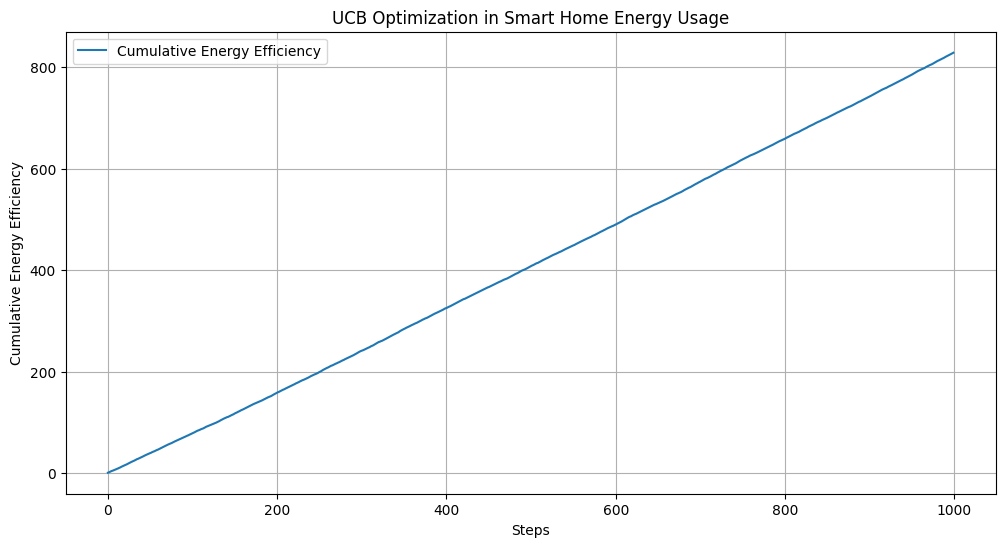

Mode counts: [ 67. 111. 201. 621.]
True mode efficiencies: [0.6, 0.7, 0.8, 0.9]


In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

# Define UCB algorithm for device modes
class UCB:
    def __init__(self, n_modes):
        self.n_modes = n_modes
        self.mode_counts = np.zeros(n_modes)  # Number of times each mode was chosen
        self.mode_rewards = np.zeros(n_modes)  # Sum of rewards for each mode

    def select_mode(self, step):
        # Use UCB to select the mode
        if step < self.n_modes:
            return step  # Choose each mode once initially

        ucb_values = [
            (self.mode_rewards[i] / (self.mode_counts[i] + 1e-5)) +
            math.sqrt(2 * math.log(step + 1) / (self.mode_counts[i] + 1e-5))
            for i in range(self.n_modes)
        ]
        return np.argmax(ucb_values)

    def update(self, mode, reward):
        # Update mode counts and rewards
        self.mode_counts[mode] += 1
        self.mode_rewards[mode] += reward

# Simulate the smart home energy optimization
def simulate_smart_home(n_steps, n_modes, true_efficiency):
    ucb = UCB(n_modes)
    total_efficiency = 0
    efficiencies = []

    for step in range(n_steps):
        mode = ucb.select_mode(step)
        # Simulate energy efficiency based on the true efficiency of the chosen mode
        efficiency = np.random.normal(loc=true_efficiency[mode], scale=0.1)
        ucb.update(mode, efficiency)
        total_efficiency += efficiency
        efficiencies.append(total_efficiency)

    return efficiencies, ucb.mode_counts

# Define parameters
n_steps = 1000  # Number of steps in the simulation
n_modes = 4  # Number of energy modes (e.g., "low", "medium", "high", "eco")
true_efficiency = [0.6, 0.7, 0.8, 0.9]  # True average efficiency for each mode

# Run the simulation
efficiencies, mode_counts = simulate_smart_home(n_steps, n_modes, true_efficiency)

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(efficiencies, label="Cumulative Energy Efficiency")
plt.xlabel("Steps")
plt.ylabel("Cumulative Energy Efficiency")
plt.title("UCB Optimization in Smart Home Energy Usage")
plt.legend()
plt.grid(True)
plt.show()

# Print mode counts and true efficiencies
print("Mode counts:", mode_counts)
print("True mode efficiencies:", true_efficiency)


### 3. Develop a Chess-like game using PAC (Probably approximately correct) algorithm where the problem set-up is as follows:



### Problem Setup
### i) Game Environment: Simplify chess to a smaller grid with basic pieces (like pawns and a king).
#### ii) PAC Learning: Train a model to approximate a move policy that is "probably approximately correct" (i.e., likely correct within some error bounds).
#### iii) Implementation Goals: Use supervised learning to train a model with a dataset of board states and corresponding optimal moves.

Implementation:

### 1. The chess-like game will have a simplified 4x4 board with only a king and a few pawns.


### 2. PAC learning will train a simple classifier (e.g., decision tree) to predict moves.

In [3]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import random

# Define the board and pieces
class ChessBoard:
    def __init__(self):
        self.board = np.zeros((4, 4), dtype=int)  # 4x4 grid
        self.king_pos = (3, 0)  # King's initial position
        self.pawn_positions = [(0, 1), (1, 3), (2, 2)]  # Pawns' initial positions
        self.place_pieces()

    def place_pieces(self):
        self.board[self.king_pos] = 1  # King represented as 1
        for pos in self.pawn_positions:
            self.board[pos] = -1  # Pawns represented as -1

    def get_features(self):
        # Flatten board as feature vector
        return self.board.flatten()

    def move_king(self, new_pos):
        x, y = self.king_pos
        self.board[x, y] = 0  # Clear old king position
        self.king_pos = new_pos
        x, y = new_pos
        self.board[x, y] = 1  # Set new king position

    def is_valid_move(self, pos):
        x, y = pos
        return 0 <= x < 4 and 0 <= y < 4 and self.board[x, y] != 1  # Inside bounds and not the king's current position

    def generate_king_moves(self):
        x, y = self.king_pos
        moves = [(x + i, y + j) for i in [-1, 0, 1] for j in [-1, 0, 1] if (i, j) != (0, 0)]
        return [move for move in moves if self.is_valid_move(move)]

# Reward function
def reward_function(board, move):
    x, y = move
    if board[x, y] == -1:  # Capture a pawn
        return 10
    else:  # Move to an empty space
        return 1

# Generate training data
def generate_training_data(n_samples):
    X = []
    y = []
    for _ in range(n_samples):
        board = ChessBoard()
        moves = board.generate_king_moves()
        optimal_move = None
        max_reward = -np.inf
        for move in moves:
            reward = reward_function(board.board, move)
            if reward > max_reward:
                max_reward = reward
                optimal_move = move
        X.append(board.get_features())
        y.append(optimal_move)
    return np.array(X), np.array(y)

# Train a PAC model (decision tree classifier)
def train_pac_model(X, y):
    # Flatten move labels for multi-output classification
    y_flat = [x * 4 + y for x, y in y]
    model = DecisionTreeClassifier(max_depth=5)
    model.fit(X, y_flat)
    return model

# Predict a move
def predict_move(model, board):
    move_flat = model.predict([board.get_features()])[0]
    return divmod(move_flat, 4)

# Simulate a game
def simulate_game(model, n_steps=10):
    board = ChessBoard()
    for step in range(n_steps):
        print(f"Step {step + 1}:")
        print(board.board)
        move = predict_move(model, board)
        print(f"King moves to: {move}")
        board.move_king(move)

# Main function
if __name__ == "__main__":
    # Generate training data
    X, y = generate_training_data(500)

    # Train PAC model
    model = train_pac_model(X, y)

    # Evaluate model accuracy
    y_flat = [x * 4 + y for x, y in y]
    predictions = model.predict(X)
    print(f"Model Accuracy: {accuracy_score(y_flat, predictions) * 100:.2f}%")

    # Simulate a game
    simulate_game(model)


Model Accuracy: 100.00%
Step 1:
[[ 0 -1  0  0]
 [ 0  0  0 -1]
 [ 0  0 -1  0]
 [ 1  0  0  0]]
King moves to: (2, 0)
Step 2:
[[ 0 -1  0  0]
 [ 0  0  0 -1]
 [ 1  0 -1  0]
 [ 0  0  0  0]]
King moves to: (2, 0)
Step 3:
[[ 0 -1  0  0]
 [ 0  0  0 -1]
 [ 1  0 -1  0]
 [ 0  0  0  0]]
King moves to: (2, 0)
Step 4:
[[ 0 -1  0  0]
 [ 0  0  0 -1]
 [ 1  0 -1  0]
 [ 0  0  0  0]]
King moves to: (2, 0)
Step 5:
[[ 0 -1  0  0]
 [ 0  0  0 -1]
 [ 1  0 -1  0]
 [ 0  0  0  0]]
King moves to: (2, 0)
Step 6:
[[ 0 -1  0  0]
 [ 0  0  0 -1]
 [ 1  0 -1  0]
 [ 0  0  0  0]]
King moves to: (2, 0)
Step 7:
[[ 0 -1  0  0]
 [ 0  0  0 -1]
 [ 1  0 -1  0]
 [ 0  0  0  0]]
King moves to: (2, 0)
Step 8:
[[ 0 -1  0  0]
 [ 0  0  0 -1]
 [ 1  0 -1  0]
 [ 0  0  0  0]]
King moves to: (2, 0)
Step 9:
[[ 0 -1  0  0]
 [ 0  0  0 -1]
 [ 1  0 -1  0]
 [ 0  0  0  0]]
King moves to: (2, 0)
Step 10:
[[ 0 -1  0  0]
 [ 0  0  0 -1]
 [ 1  0 -1  0]
 [ 0  0  0  0]]
King moves to: (2, 0)


 ## Implementation


 1. The chess-like game will have a simplified 4x4 board with only a king and a few pawns. 2.pca learining will train a simple classifier (e.g., decision tree) to predict moves.

1. Chess-like Game on a 4x4 Board
In your simplified chess-like game, you mentioned that the board has only a king and a few pawns. Here are the key elements of this game:

Board: A 4x4 grid, which gives 16 positions.
Pieces:
King: Can move one square in any direction (horizontally, vertically, or diagonally).
Pawns: Can move one square forward (vertically) but can capture diagonally.
Game Representation:
The 4x4 board can be represented as a 2D array or list of lists, where each element can hold information about the piece at that position. For example:

python
Copy
board = [['empty', 'empty', 'empty', 'empty'],
         ['empty', 'king', 'pawn', 'empty'],
         ['empty', 'pawn', 'empty', 'empty'],
         ['empty', 'empty', 'empty', 'empty']]
Moves:

The king can move to any neighboring square, as long as it's within the bounds of the board and not occupied by another piece (depending on the rules you define).
Pawns can move forward (vertically) or capture diagonally.
2. PCA and Decision Tree Classifier for Move Prediction
In the second part of your project, you're interested in applying Principal Component Analysis (PCA) and a decision tree classifier to predict moves in this simplified chess game. Here's how you can approach this:

A. Data Representation:
For machine learning, you'll need to represent the game states (positions on the board) as feature vectors. Since the board is 4x4, you can flatten it into a 1D vector, where each position can be represented by a feature. You might represent the pieces with numerical values, such as:

Empty: 0
King: 1
Pawn: 2
For example, the 4x4 board could be flattened into a 16-dimensional vector:

python
Copy
# Flattened board: [0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0]
# where 1 represents the king, and 2 represents pawns
B. Feature Engineering:
You need to generate features that describe the current game state. These features could include:

The position of the king and pawns.
The possible moves the king and pawns can make (e.g., a feature vector representing all possible moves for the king).
The number of pieces on the board.
Relative distance of the king from the pawns, etc.
C. Principal Component Analysis (PCA):
Before training a classifier, you can use PCA to reduce the dimensionality of your data (if necessary) and focus on the most important features. PCA will help you capture the most variance in the data by transforming the original features into new ones (principal components).

Why PCA?: If you have a large feature space or redundant features, PCA can help in reducing the dimensions and keeping only the most significant ones. This might speed up training and prevent overfitting.
D. Decision Tree Classifier:
Once you have your features, you can use a decision tree classifier to predict the next best move. A decision tree will learn to make decisions based on feature values that lead to the best move outcome.

For each game state, the classifier will predict the optimal move for the king or pawn based on previous data.
The target variable for training could be the destination position for a move (or the type of move, like "king moves up-right", "pawn captures diagonally", etc.).
E. Training the Model:
Collect Data: You’ll need a dataset of game states (boards) and the corresponding moves made. You can manually generate these data by simulating game scenarios or use a predefined dataset if available.
PCA Transformation: Apply PCA on the data to reduce its dimensionality if necessary.
Train the Decision Tree: Use the transformed features to train the decision tree to predict the next move.


Define Game Rules: Ensure that you define all valid moves for the king and pawns.
Generate Training Data: Simulate multiple game states and label them with the correct moves.
Apply PCA: Reduce the dimensionality of the feature space if needed.
Train Classifier: Train the decision tree classifier to predict the best move based on the current game state.
Test and Validate: Test the system on new, unseen game states and adjust as necessary.
Conclusion:
Game Setup: Simplified 4x4 chess-like game with a king and pawns.
PCA and Decision Tree: Use PCA to reduce the dimensionality of the data and a decision tree classifier to predict moves based on the current board state.

In [6]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier

# Simulating a 4x4 board with king and pawns
def flatten_board(board):
    flat_board = []
    for row in board:
        for cell in row:
            if cell == 'king':
                flat_board.append(1)
            elif cell == 'pawn':
                flat_board.append(2)
            else:
                flat_board.append(0)
    return np.array(flat_board)

# Example board state
board = [['empty', 'king', 'pawn', 'empty'],
         ['empty', 'empty', 'empty', 'pawn'],
         ['pawn', 'empty', 'empty', 'empty'],
         ['empty', 'empty', 'empty', 'empty']]

# Flatten the board into a feature vector
features = flatten_board(board)
X_train = []
y_train = []
for i in range(100):
    board = [[random.choice(['empty', 'king', 'pawn']) if random.random() < 0.2 else 'empty' for _ in range(4)] for _ in range(4)]
    features = flatten_board(board)
    y_train.append(random.randint(0, 8))  # Adjust range as per your move options
    X_train.append(features)

# Convert X_train to numpy array
X_train = np.array(X_train)
pca = PCA(n_components=min(X_train.shape[0], X_train.shape[1]))  # Adjust n_components
X_train_reduced = pca.fit_transform(X_train)

# Train the decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train_reduced, y_train)

# Predict a move (this is just a simple example)
predicted_move = clf.predict(pca.transform([features]))
print(f"Predicted move: {predicted_move}")

Predicted move: [6]
